In [180]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import matplotlib.pylab as plt
import time
import random
from IPython import display
%matplotlib inline

/home/xxx/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


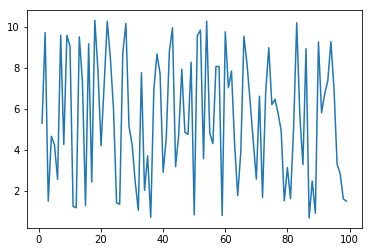

In [181]:
x = np.arange(100)

delta = np.random.uniform(0,10, size=(100,))

y = .4 * x/x + delta

plt.plot(x,y)
plt.show()

(array([  1.00581392e+00,   1.96348424e-01,   2.35104254e+02,
         2.00995840e+00,   1.96342385e-01,   1.17737289e+02]), '\n', array([  2.54540158e-03,   2.55536709e-03,   2.63952690e+00,
         5.08271064e-03,   5.10251682e-03,   2.63955248e+00]))


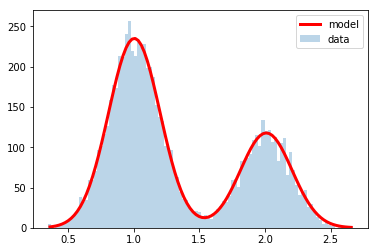

In [183]:
from pylab import *
from scipy.optimize import curve_fit

data=concatenate((normal(1,.2,5000),normal(2,.2,2500)))
y,x,_=hist(data,100,alpha=.3,label='data')

x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

expected=(1,.2,250,2,.2,125)
params,cov=curve_fit(bimodal,x,y,expected)
sigma=sqrt(diag(cov))
plot(x,bimodal(x,*params),color='red',lw=3,label='model')
legend()
print(params,'\n',sigma)    

In [184]:
data

array([ 1.1249949 ,  0.51184292,  1.22361432, ...,  2.07946084,
        2.1676282 ,  2.04146232])

In [185]:
x

array([ 0.36355368,  0.38671559,  0.4098775 ,  0.4330394 ,  0.45620131,
        0.47936322,  0.50252513,  0.52568703,  0.54884894,  0.57201085,
        0.59517276,  0.61833466,  0.64149657,  0.66465848,  0.68782038,
        0.71098229,  0.7341442 ,  0.75730611,  0.78046801,  0.80362992,
        0.82679183,  0.84995374,  0.87311564,  0.89627755,  0.91943946,
        0.94260137,  0.96576327,  0.98892518,  1.01208709,  1.03524899,
        1.0584109 ,  1.08157281,  1.10473472,  1.12789662,  1.15105853,
        1.17422044,  1.19738235,  1.22054425,  1.24370616,  1.26686807,
        1.29002998,  1.31319188,  1.33635379,  1.3595157 ,  1.38267761,
        1.40583951,  1.42900142,  1.45216333,  1.47532523,  1.49848714,
        1.52164905,  1.54481096,  1.56797286,  1.59113477,  1.61429668,
        1.63745859,  1.66062049,  1.6837824 ,  1.70694431,  1.73010622,
        1.75326812,  1.77643003,  1.79959194,  1.82275384,  1.84591575,
        1.86907766,  1.89223957,  1.91540147,  1.93856338,  1.96

In [186]:
y

array([   5.,    0.,    2.,    3.,    3.,    7.,   10.,   14.,   16.,
         19.,   38.,   32.,   35.,   59.,   59.,   71.,   97.,  101.,
        116.,  126.,  158.,  177.,  174.,  213.,  212.,  241.,  257.,
        220.,  213.,  232.,  224.,  228.,  198.,  199.,  187.,  153.,
        138.,  132.,  102.,   99.,   97.,   69.,   63.,   44.,   36.,
         34.,   24.,   20.,   21.,   19.,   14.,   16.,   15.,   11.,
         16.,   23.,   27.,   33.,   32.,   40.,   59.,   60.,   51.,
         83.,   84.,   87.,   91.,  109.,  115.,  102.,  134.,  120.,
        121.,  107.,  113.,   83.,  105.,  111.,   66.,   94.,   72.,
         53.,   41.,   45.,   47.,   26.,   30.,   21.,   14.,   10.,
          5.,    7.,    3.,    2.,    0.,    2.,    0.,    2.,    0.,    1.])

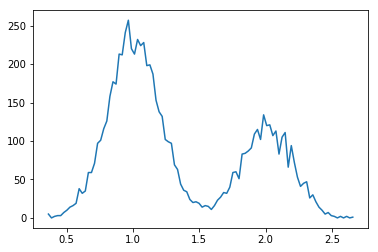

In [187]:
plt.plot(x,y)
plt.show()

In [188]:
#for x,y in zip(x,y):
#    print x,y

In [189]:
x = range(1,101)

In [190]:
d = {'x': x, 'y': y}
df = DataFrame(data=d, index=x)
df.head()

,x,y
1,1,5.0
2,2,0.0
3,3,2.0
4,4,3.0
5,5,3.0


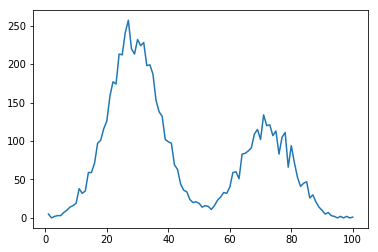

In [191]:
df["y"].plot()

In [192]:
# now do some smoothing
df["ysmth"] = df.y.rolling(10, win_type='triang').sum()

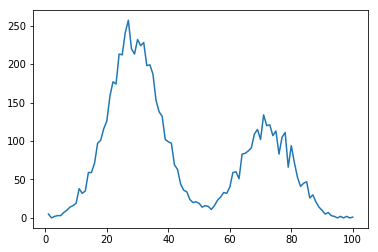

In [193]:
# looks better right?
df.y.plot()

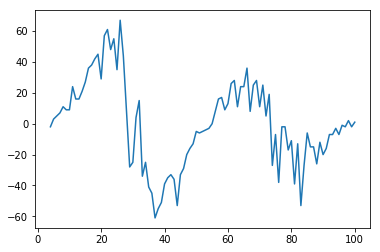

In [194]:
df['ydiff'] = df['y'] - df['y'].shift(3)
df['ydiff']
plt.plot(df.x,df.ydiff)
plt.show()

In [195]:
df

,x,y,ysmth,ydiff
1,1,5.0,NaN,NaN
2,2,0.0,NaN,NaN
3,3,2.0,NaN,NaN
4,4,3.0,NaN,-2.0
5,5,3.0,NaN,3.0
6,6,7.0,NaN,5.0
7,7,10.0,NaN,7.0
8,8,14.0,NaN,11.0
9,9,16.0,NaN,9.0
10,10,19.0,33.3,9.0


In [196]:
df.ydiff.std()

27.91240671195532

In [197]:
# just for visualisation purposes
def checkPositive(val):
    # heating
    if val > 0:
        return 250
    # idle
    elif val == 0 :
        return 1
    # cooling
    else:
        return -50
    
def classify(val):
    # heating
    if val > 0:
        return 2
    # idle
    elif val == 0 :
        return 1
    # cooling
    else:
        return 0
        
df["diffb"] = df["ydiff"].apply(lambda x: checkPositive(x))
df["class"] = df["ydiff"].apply(lambda x: classify(x))

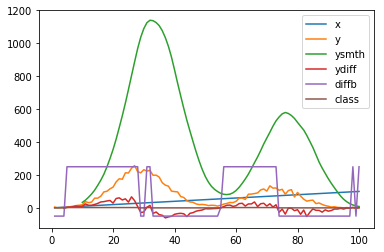

In [198]:
df.plot()

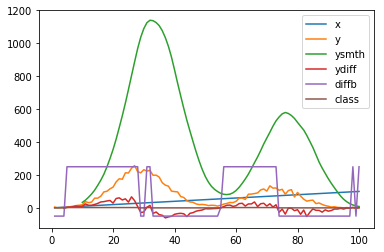

In [199]:
df.plot()

In [200]:
X = df[["x","y"]]
X2 = df[["x","ydiff"]]
y = df["class"]

In [201]:
len(np.cross(X,X2))

100

Text(0.5,1,u'SVM Decision Region Boundary')

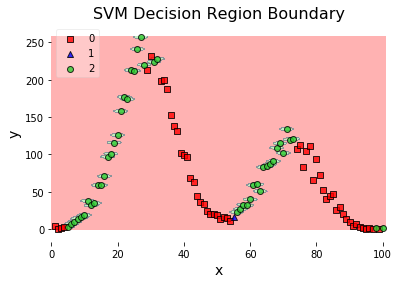

In [202]:
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
clf = svm.SVC(kernel='rbf')
clf.fit(X.values, y.values) 
#clf.predict([[78,106.0]])

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)


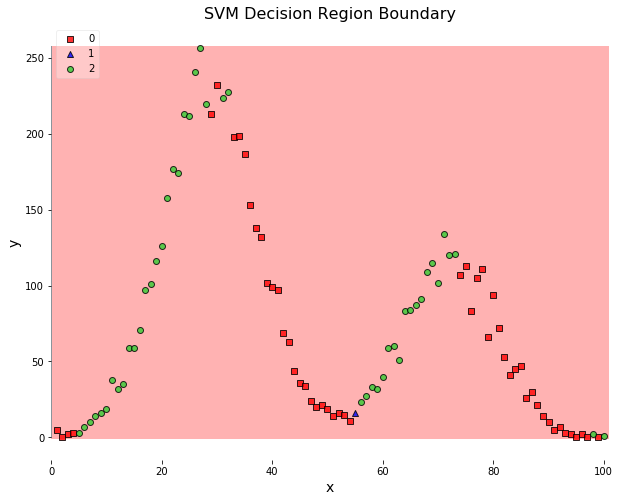

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from IPython import display
%matplotlib inline


# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

X = df[["x","y"]]
y = df["class"]
clf = svm.SVC(kernel='sigmoid')
clf.fit(X.values, y.values) 
#clf.predict([[78,106.0]])

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

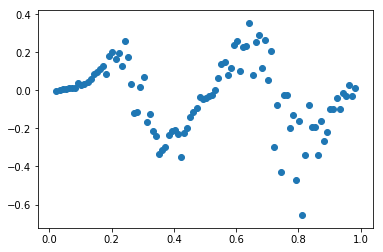

In [204]:
# calculate third dimension (to fit margin)
Z = [(arr[0]/X2.x.max())*(arr[1]/X2.ydiff.max()) for arr in X2[["x","ydiff"]].values]
x2 = abs(X2.x-X2.x.mean()/X2.x.std())/X2.x.max()

plt.scatter(x2,Z)

In [205]:
new_df = pd.DataFrame(
    {'x': x2,
     'z': Z
    })

new_df

,x,z
1,0.007407,NaN
2,0.002593,NaN
3,0.012593,NaN
4,0.022593,-0.001194
5,0.032593,0.002239
6,0.042593,0.004478
7,0.052593,0.007313
8,0.062593,0.013134
9,0.072593,0.012090
10,0.082593,0.013433


In [146]:
df["z"] = Z
X = df[["x","y"]]
X2 = df[["x","ydiff"]]
y = df["class"]

In [151]:
df2 = df.dropna()
df2.head()

,x,y,ysmth,ydiff,diffb,class,z
10,10,18.0,30.9,10.0,250,2,0.011236
11,11,26.0,44.0,11.0,250,2,0.013596
12,12,48.0,62.4,27.0,250,2,0.036404
13,13,50.0,86.1,32.0,250,2,0.046742
14,14,71.0,115.2,45.0,250,2,0.070787


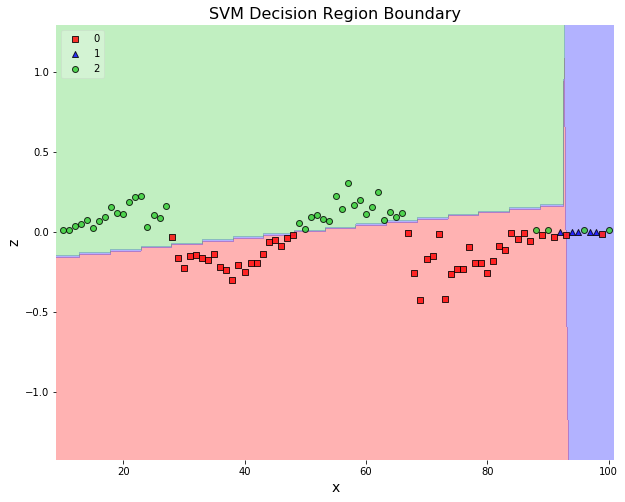

In [157]:
# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

X = df2[["x","z"]]
y = df2["class"]
clf = svm.SVC(kernel='linear')
clf.fit(X.values, y.values) 
#clf.predict([[78,106.0]])

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

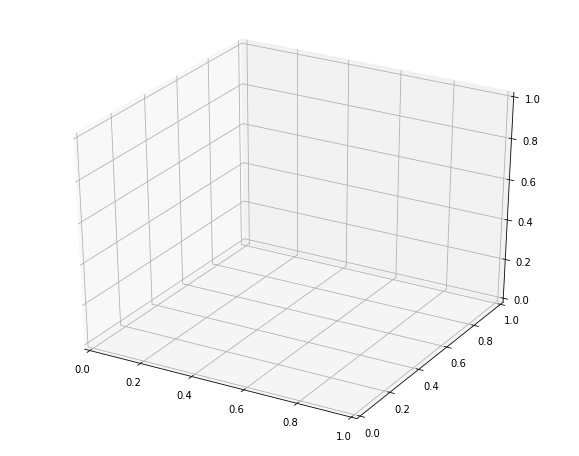

In [179]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.figure(figsize=(26,12))
%matplotlib inline


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x =df.x.values
y =df.ydiff.values
z =Z



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [48]:
X

,x,y
1,1,2.0
2,2,1.0
3,3,0.0
4,4,3.0
5,5,1.0
6,6,4.0
7,7,8.0
8,8,9.0
9,9,10.0
10,10,12.0


In [167]:
df = df.dropna()
df.head()

,x,y,ysmth,ydiff,diffb,class,z
10,10,18.0,30.9,10.0,250,2,0.011236
11,11,26.0,44.0,11.0,250,2,0.013596
12,12,48.0,62.4,27.0,250,2,0.036404
13,13,50.0,86.1,32.0,250,2,0.046742
14,14,71.0,115.2,45.0,250,2,0.070787


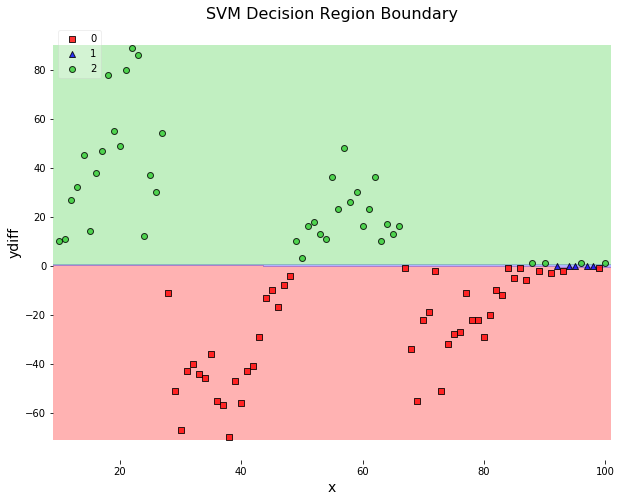

In [168]:
# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

X = df[["x","ydiff"]]
y = df["class"]
clf = svm.SVC(kernel='linear')
clf.fit(X.values, y.values) 
#clf.predict([[78,106.0]])

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

In [166]:
df.head()

,x,y,ysmth,ydiff,diffb,class,z
1,1,1.0,NaN,NaN,-50,0,NaN
2,2,0.0,NaN,NaN,-50,0,NaN
3,3,1.0,NaN,NaN,-50,0,NaN
4,4,4.0,NaN,3.0,250,2,0.001348
5,5,4.0,NaN,4.0,250,2,0.002247
